In [1]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Koneksi ke PostgreSQL
conn = psycopg2.connect(
    host="localhost",
    database="web_honeypot_vps_new",
    user="postgres",
    password="admin"
)

In [2]:
query = """
SELECT 
    method, 
    status,
    ip,
    port,
    user_agent,
    detection_name,
    detection_type,
    date_trunc('day', timestamp) AS date
FROM web_traffic_logs_preprocessed;
"""

df = pd.read_sql(query, conn)

# statistik deskriptif
print(df.describe(include='all'))

       method  status              ip          port  \
count     423   423.0             423    423.000000   
unique      5     NaN             106           NaN   
top       GET     NaN  180.248.32.210           NaN   
freq      362     NaN              54           NaN   
mean      NaN   200.0             NaN  43374.130024   
min       NaN   200.0             NaN   8024.000000   
25%       NaN   200.0             NaN  35481.000000   
50%       NaN   200.0             NaN  43609.000000   
75%       NaN   200.0             NaN  54225.000000   
max       NaN   200.0             NaN  65384.000000   
std       NaN     0.0             NaN  12882.241143   

                                               user_agent detection_name  \
count                                                 406            423   
unique                                                 89              6   
top     Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...          index   
freq                               

C:\Users\KAKA\AppData\Local\Temp\ipykernel_19876\3282850314.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [3]:
# Serangan per hari
df_per_day = df.groupby("date").size().reset_index(name='jumlah')
df_per_day

,date,jumlah
0,2025-06-14,109
1,2025-06-16,75
2,2025-06-17,46
3,2025-06-18,45
4,2025-06-19,95
5,2025-06-20,32
6,2025-06-21,21


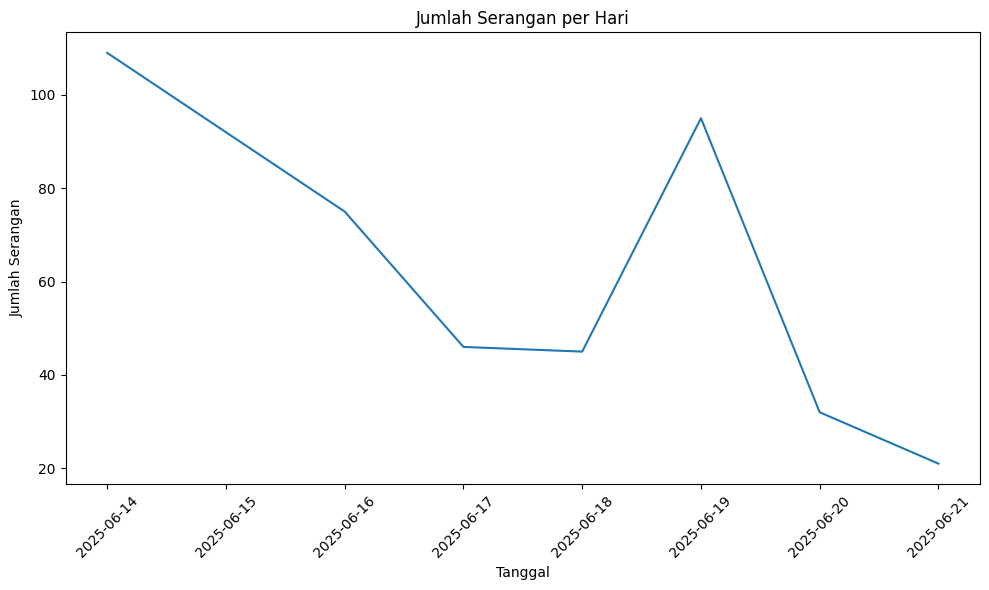

In [4]:
# Visualisasi serangan per hari
plt.figure(figsize=(10,6))
sns.lineplot(data=df_per_day, x="date", y="jumlah")
plt.title("Jumlah Serangan per Hari")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Serangan")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [5]:
# Top 10 serangan terdeteksi
df_filtered = df[df['detection_name'].str.contains('index', case=False, na=False) == False]
top10 = df_filtered['detection_name'].value_counts().nlargest(10)

top10

detection_name
unknown     7
lfi         3
cmd_exec    3
xss         2
sqli        1
Name: count, dtype: int64

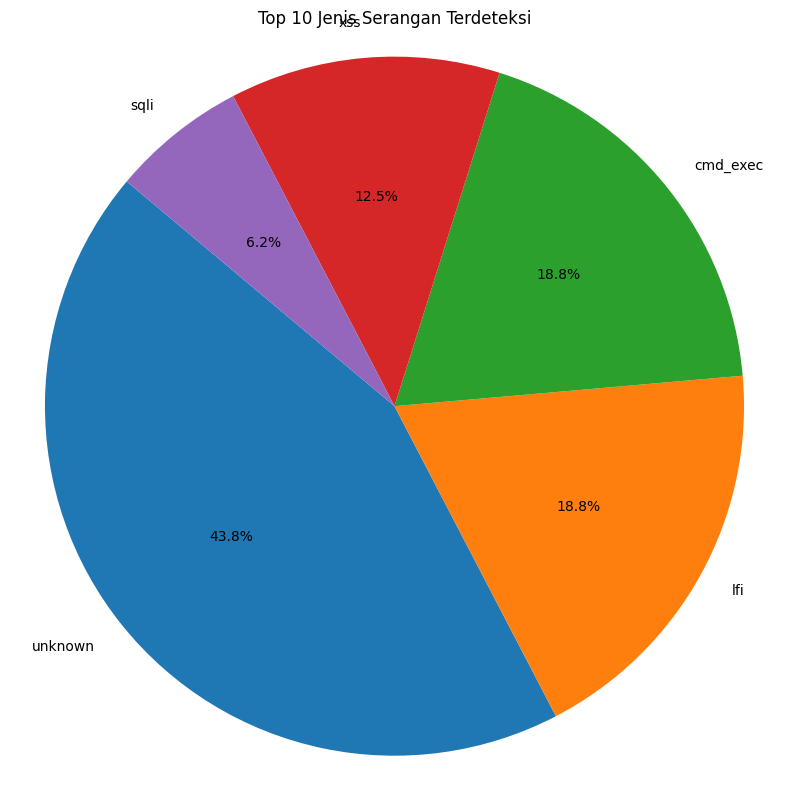

In [6]:
# Visualisasi top 10 serangan terdeteksi
plt.figure(figsize=(8, 8))
plt.pie(top10.values, labels=top10.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Jenis Serangan Terdeteksi')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [7]:
# Distribusi metode HTTP
df['method'].value_counts()

method
GET         362
HEAD         46
POST          9
OPTIONS       3
PROPFIND      3
Name: count, dtype: int64

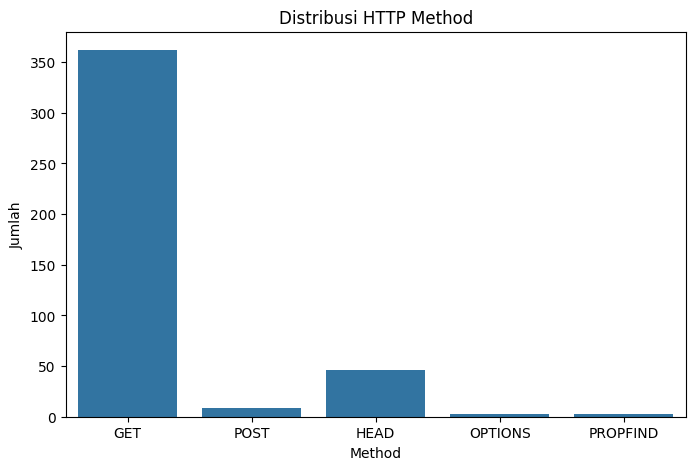

In [8]:
# Visualisasi distribusi metode HTTP
plt.figure(figsize=(8,5))
sns.countplot(x="method", data=df)
plt.title("Distribusi HTTP Method")
plt.xlabel("Method")
plt.ylabel("Jumlah")
plt.show()

In [9]:
# Top 10 IP Penyerang
top_ips = df["ip"].value_counts().head(10)
top_ips

ip
180.248.32.210     54
204.76.203.211     48
167.172.162.112    45
172.18.0.1         31
85.204.70.104      21
172.105.157.44     16
185.218.84.178     11
170.39.218.2        8
5.183.209.244       8
152.32.141.154      8
Name: count, dtype: int64

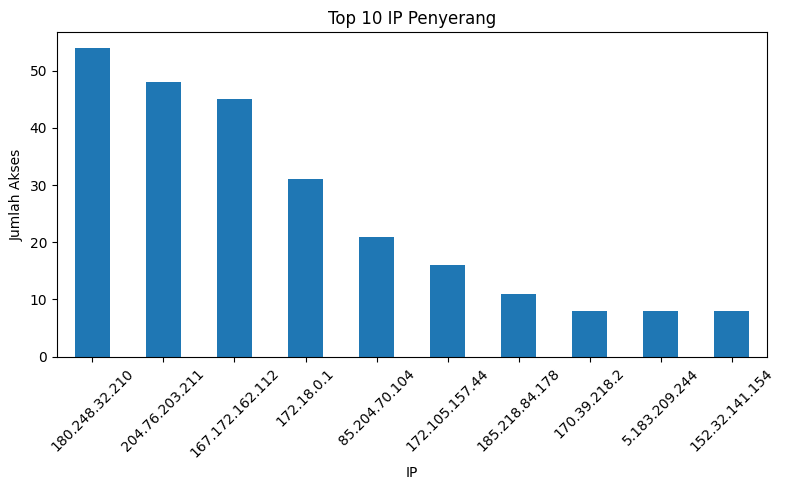

In [10]:
# Visualisasi top 10 IP Penyerang
plt.figure(figsize=(8,5))
top_ips.plot(kind="bar")
plt.title("Top 10 IP Penyerang")
plt.xlabel("IP")
plt.ylabel("Jumlah Akses")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
# Top 10 User Agents
top_ua = df["user_agent"].value_counts().head(10)
top_ua

user_agent
Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/137.0.0.0 Safari/537.36                                55
Hello World/1.0                                                                                                                                48
Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.85 Safari/537.36 Edg/90.0.818.46             33
curl/7.68.0                                                                                                                                    31
Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36                            25
Mozilla/5.0 (iPhone; CPU iPhone OS 13_2_3 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/13.0.3 Mobile/15E148 Safari/604.1    25
Mozilla/5.0 (compatible; CensysInspect/1.1; +https://about.censys.io/)                                           

C:\Users\KAKA\AppData\Local\Temp\ipykernel_19876\3238192996.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


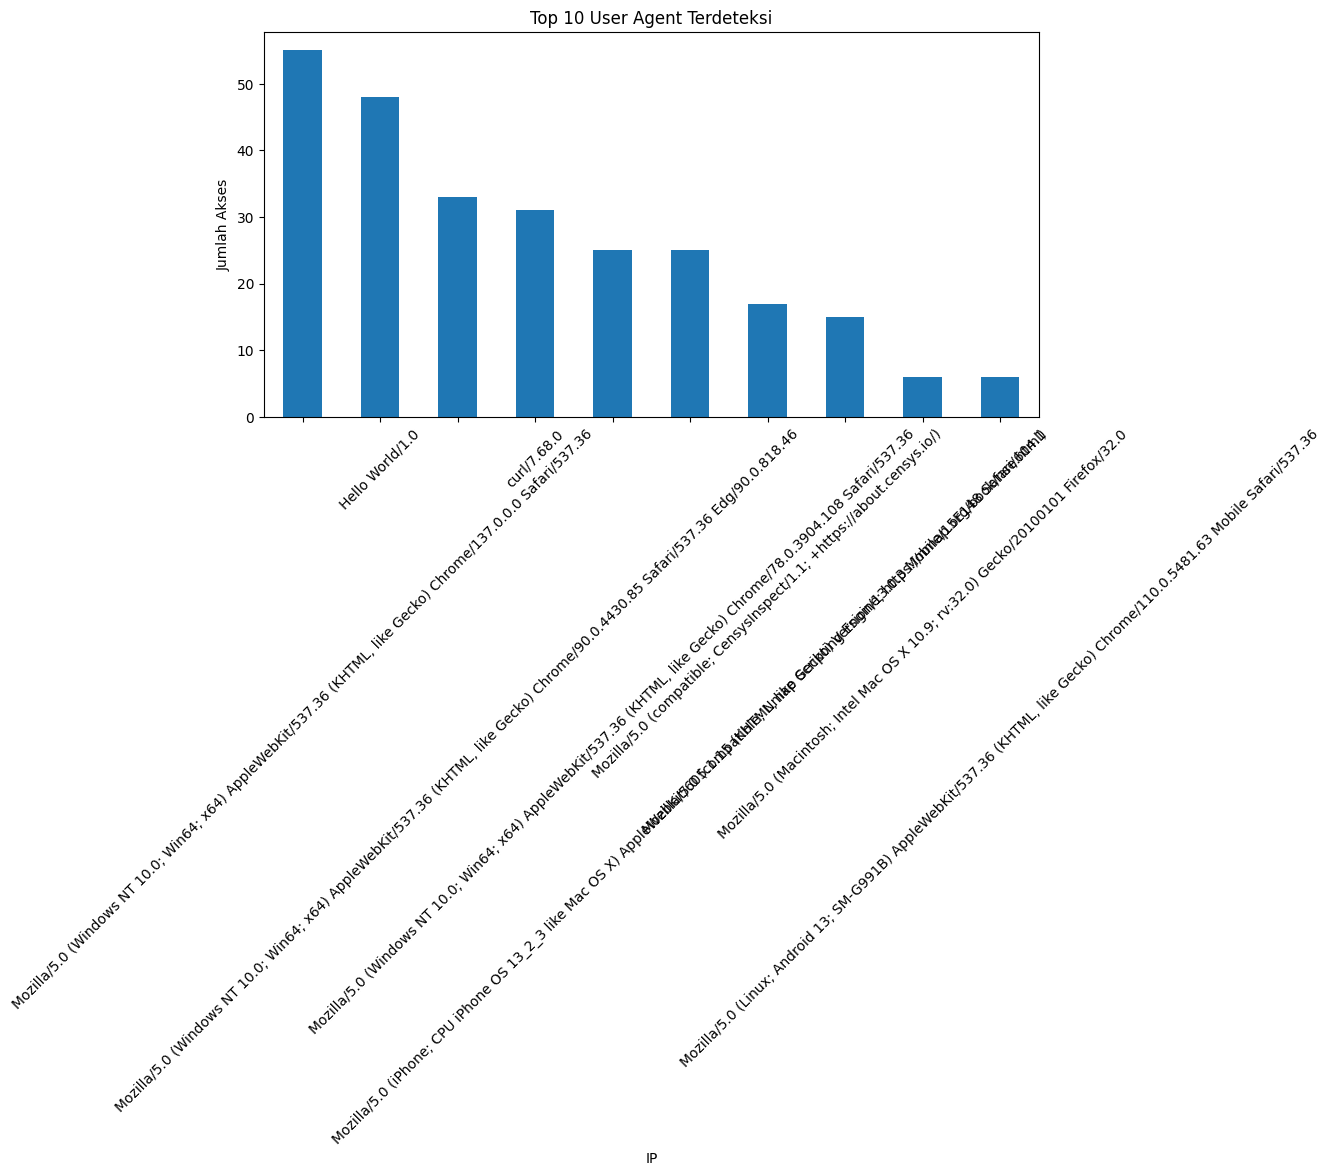

In [12]:
# Visualisasi top 10 User Agents
plt.figure(figsize=(10, 5))
top_ua.plot(kind="bar")
plt.title("Top 10 User Agent Terdeteksi")
plt.xlabel("IP")
plt.ylabel("Jumlah Akses")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
conn.close()